In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [33]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
health = pd.read_csv('C:/Users/yongchae/Desktop/SKN/국민건강보험공단_건강검진정보_2023.CSV', encoding = 'cp949')

In [5]:
health.head().T

,0,1,2,3,4
기준년도,2023.0,2023.0,2023.0,2023.0,2023.0
가입자일련번호,34735.0,4105118.0,362482.0,653166.0,4152237.0
시도코드,46.0,11.0,36.0,11.0,41.0
성별코드,2.0,1.0,2.0,1.0,1.0
연령대코드(5세단위),9.0,17.0,13.0,13.0,12.0
신장(5cm단위),155.0,160.0,150.0,160.0,165.0
체중(5kg단위),70.0,55.0,65.0,70.0,65.0
허리둘레,92.0,86.0,96.0,85.0,84.5
시력(좌),1.2,0.9,1.0,1.0,1.0
시력(우),1.2,9.9,0.8,1.2,1.2


In [6]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자일련번호        1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대코드(5세단위)    1000000 non-null  int64  
 5   신장(5cm단위)      1000000 non-null  int64  
 6   체중(5kg단위)      1000000 non-null  int64  
 7   허리둘레           999589 non-null   float64
 8   시력(좌)          999816 non-null   float64
 9   시력(우)          999823 non-null   float64
 10  청력(좌)          999863 non-null   float64
 11  청력(우)          999862 non-null   float64
 12  수축기혈압          994253 non-null   float64
 13  이완기혈압          994253 non-null   float64
 14  식전혈당(공복혈당)     994186 non-null   float64
 15  총콜레스테롤         338606 non-null   float64
 16  트리글리세라이드       338606 non-null   float64
 17  HDL콜레스테롤 

In [7]:
health.isnull().mean()

기준년도             0.000000
가입자일련번호          0.000000
시도코드             0.000000
성별코드             0.000000
연령대코드(5세단위)      0.000000
신장(5cm단위)        0.000000
체중(5kg단위)        0.000000
허리둘레             0.000411
시력(좌)            0.000184
시력(우)            0.000177
청력(좌)            0.000137
청력(우)            0.000138
수축기혈압            0.005747
이완기혈압            0.005747
식전혈당(공복혈당)       0.005814
총콜레스테롤           0.661394
트리글리세라이드         0.661394
HDL콜레스테롤         0.661394
LDL콜레스테롤         0.667247
혈색소              0.005817
요단백              0.011156
혈청크레아티닌          0.005814
혈청지오티(AST)       0.005816
혈청지피티(ALT)       0.005816
감마지티피            0.005813
흡연상태             0.000089
음주여부             0.000056
구강검진수검여부         0.000000
치아우식증유무          0.653152
결손치 유무           1.000000
치아마모증유무          1.000000
제3대구치(사랑니) 이상    1.000000
치석               0.653152
dtype: float64

In [81]:
missing_ratio = health.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > 0.65].index.tolist()

health_drop = health.drop(columns=columns_to_drop, axis=1)
health_drop = health_drop.drop(['가입자일련번호', '기준년도'], axis=1)

In [25]:
# 남은 컬럼 중에 결측치는 평균값 대체
missing_cols = health_drop.columns[health_drop.isnull().any()].tolist()

for col in missing_cols:
    mean_value = health_drop[col].mean()
    health_drop[col] = health_drop[col].fillna(mean_value)

health_drop.head(2).T

,0,1
시도코드,46.0,11.0
성별코드,2.0,1.0
연령대코드(5세단위),9.0,17.0
신장(5cm단위),155.0,160.0
체중(5kg단위),70.0,55.0
허리둘레,92.0,86.0
시력(좌),1.2,0.9
시력(우),1.2,9.9
청력(좌),1.0,1.0
청력(우),1.0,2.0


In [82]:
# 결측값이 있는 컬럼 리스트 추출
missing_cols = health_drop.columns[health_drop.isnull().any()].tolist()

# 연령대코드로 그룹화해서 각 그룹 평균으로 결측값 채우기
for col in missing_cols:
    health_drop[col] = health_drop.groupby('연령대코드(5세단위)')[col].transform(lambda x: x.fillna(x.mean()))


In [83]:
health_drop.tail().T

,999995,999996,999997,999998,999999
시도코드,26.0,41.0,41.0,41.0,31.0
성별코드,1.0,1.0,2.0,2.0,2.0
연령대코드(5세단위),8.0,10.0,11.0,7.0,12.0
신장(5cm단위),170.0,165.0,155.0,160.0,160.0
체중(5kg단위),65.0,80.0,65.0,55.0,50.0
허리둘레,78.0,96.1,87.0,69.0,75.0
시력(좌),1.2,0.9,0.5,1.0,0.8
시력(우),1.0,1.2,0.7,1.2,0.7
청력(좌),1.0,1.0,1.0,1.0,1.0
청력(우),1.0,1.0,1.0,1.0,1.0


In [84]:
health_drop.columns

Index(['시도코드', '성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레',
       '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부'],
      dtype='object')

In [85]:
group_health = health_drop.groupby(['성별코드', '연령대코드(5세단위)']).mean(numeric_only=True).reset_index()


In [86]:
group_health

,성별코드,연령대코드(5세단위),시도코드,신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),...,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부
0,1,5,34.760568,171.880599,72.706117,81.782699,1.046334,1.046521,1.005040,1.004620,...,91.916587,15.508712,1.114938,0.939900,26.036302,29.357002,28.721532,1.750521,0.811870,0.462066
1,1,6,34.200831,171.902356,74.543837,83.896020,1.073495,1.068291,1.003423,1.003423,...,93.395731,15.454716,1.107239,0.950766,26.976048,31.411499,34.747054,1.820891,0.849485,0.509115
2,1,7,33.417330,172.248384,76.594063,86.067701,1.088397,1.081231,1.003962,1.004002,...,95.799707,15.427322,1.128442,0.951554,28.072554,34.722347,41.517459,1.803410,0.856107,0.489632
3,1,8,34.232659,172.179250,77.322847,87.462709,1.105626,1.101154,1.004943,1.005036,...,99.136970,15.403699,1.138450,0.946916,28.557484,36.058243,48.366167,1.888400,0.855734,0.473494
4,1,9,34.254697,171.862407,76.192302,87.287878,1.084071,1.083660,1.007655,1.007562,...,101.397414,15.398644,1.151862,0.948852,29.236283,35.287189,52.657329,2.051673,0.853781,0.410908
5,1,10,34.611840,170.573026,74.212383,86.645854,1.035989,1.035096,1.011435,1.010419,...,104.292638,15.313465,1.145218,0.950023,29.005008,33.341812,53.756967,2.135362,0.838715,0.397463
6,1,11,34.464261,169.218407,72.014851,86.102219,1.008808,1.006911,1.018121,1.017108,...,106.292872,15.249741,1.156425,0.950508,29.187959,31.542496,52.964895,2.114289,0.809085,0.357788
7,1,12,34.823640,167.555234,69.628817,85.706263,0.978934,0.978484,1.031909,1.029094,...,108.604506,15.100186,1.152026,0.951897,29.172186,29.961841,50.526177,2.062013,0.773827,0.351925
8,1,13,34.496846,166.214623,67.709686,85.659361,0.923026,0.921448,1.051922,1.049512,...,109.263319,14.967398,1.162754,0.953279,29.801248,28.943975,46.872678,1.967883,0.715646,0.305449
9,1,14,34.018235,164.902360,66.236302,85.879026,0.869157,0.877733,1.080877,1.076803,...,109.615218,14.745790,1.165084,0.962366,29.678587,27.631397,43.055540,1.882888,0.643417,0.268025


<Axes: >

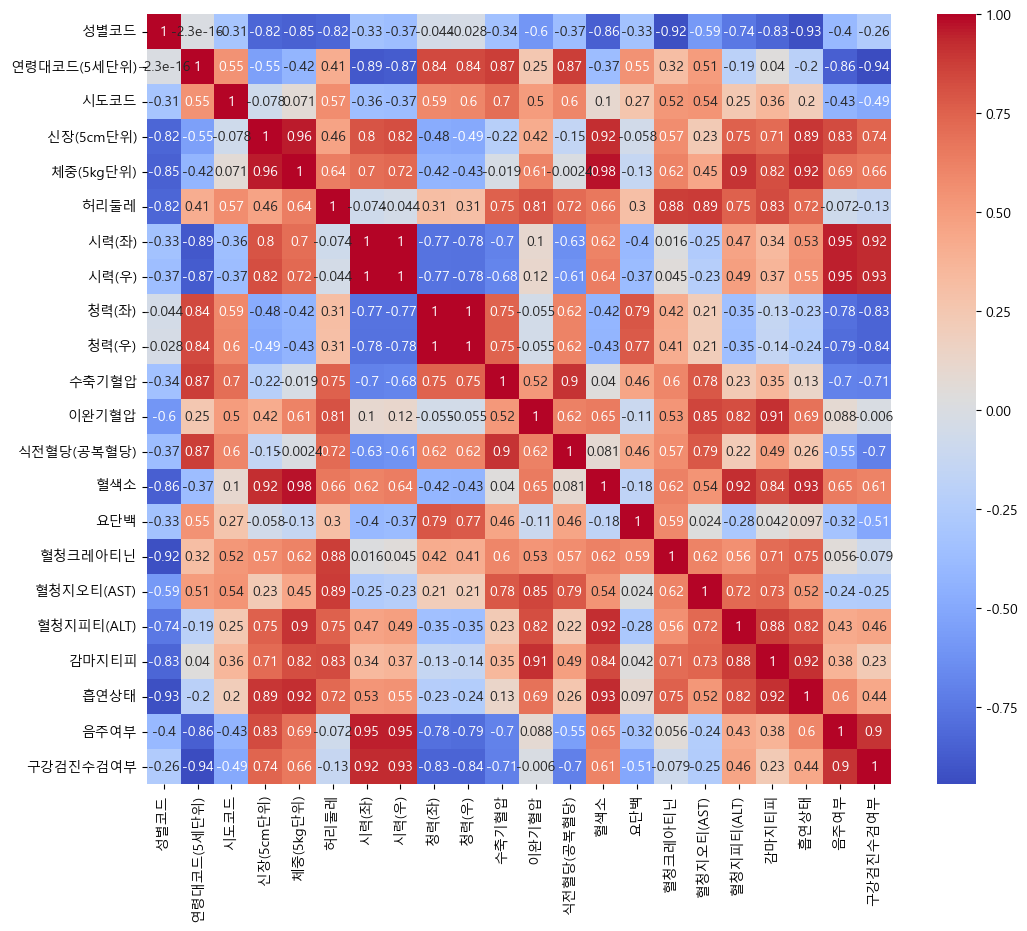

In [87]:
plt.figure(figsize=(12,10))
sns.heatmap(group_health.corr(), annot=True, cmap='coolwarm')

In [88]:
gan = group_health[['성별코드', '연령대코드(5세단위)', '음주여부', '허리둘레', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']]
gan

,성별코드,연령대코드(5세단위),음주여부,허리둘레,혈청지오티(AST),혈청지피티(ALT),감마지티피
0,1,5,0.811870,81.782699,26.036302,29.357002,28.721532
1,1,6,0.849485,83.896020,26.976048,31.411499,34.747054
2,1,7,0.856107,86.067701,28.072554,34.722347,41.517459
3,1,8,0.855734,87.462709,28.557484,36.058243,48.366167
4,1,9,0.853781,87.287878,29.236283,35.287189,52.657329
5,1,10,0.838715,86.645854,29.005008,33.341812,53.756967
6,1,11,0.809085,86.102219,29.187959,31.542496,52.964895
7,1,12,0.773827,85.706263,29.172186,29.961841,50.526177
8,1,13,0.715646,85.659361,29.801248,28.943975,46.872678
9,1,14,0.643417,85.879026,29.678587,27.631397,43.055540


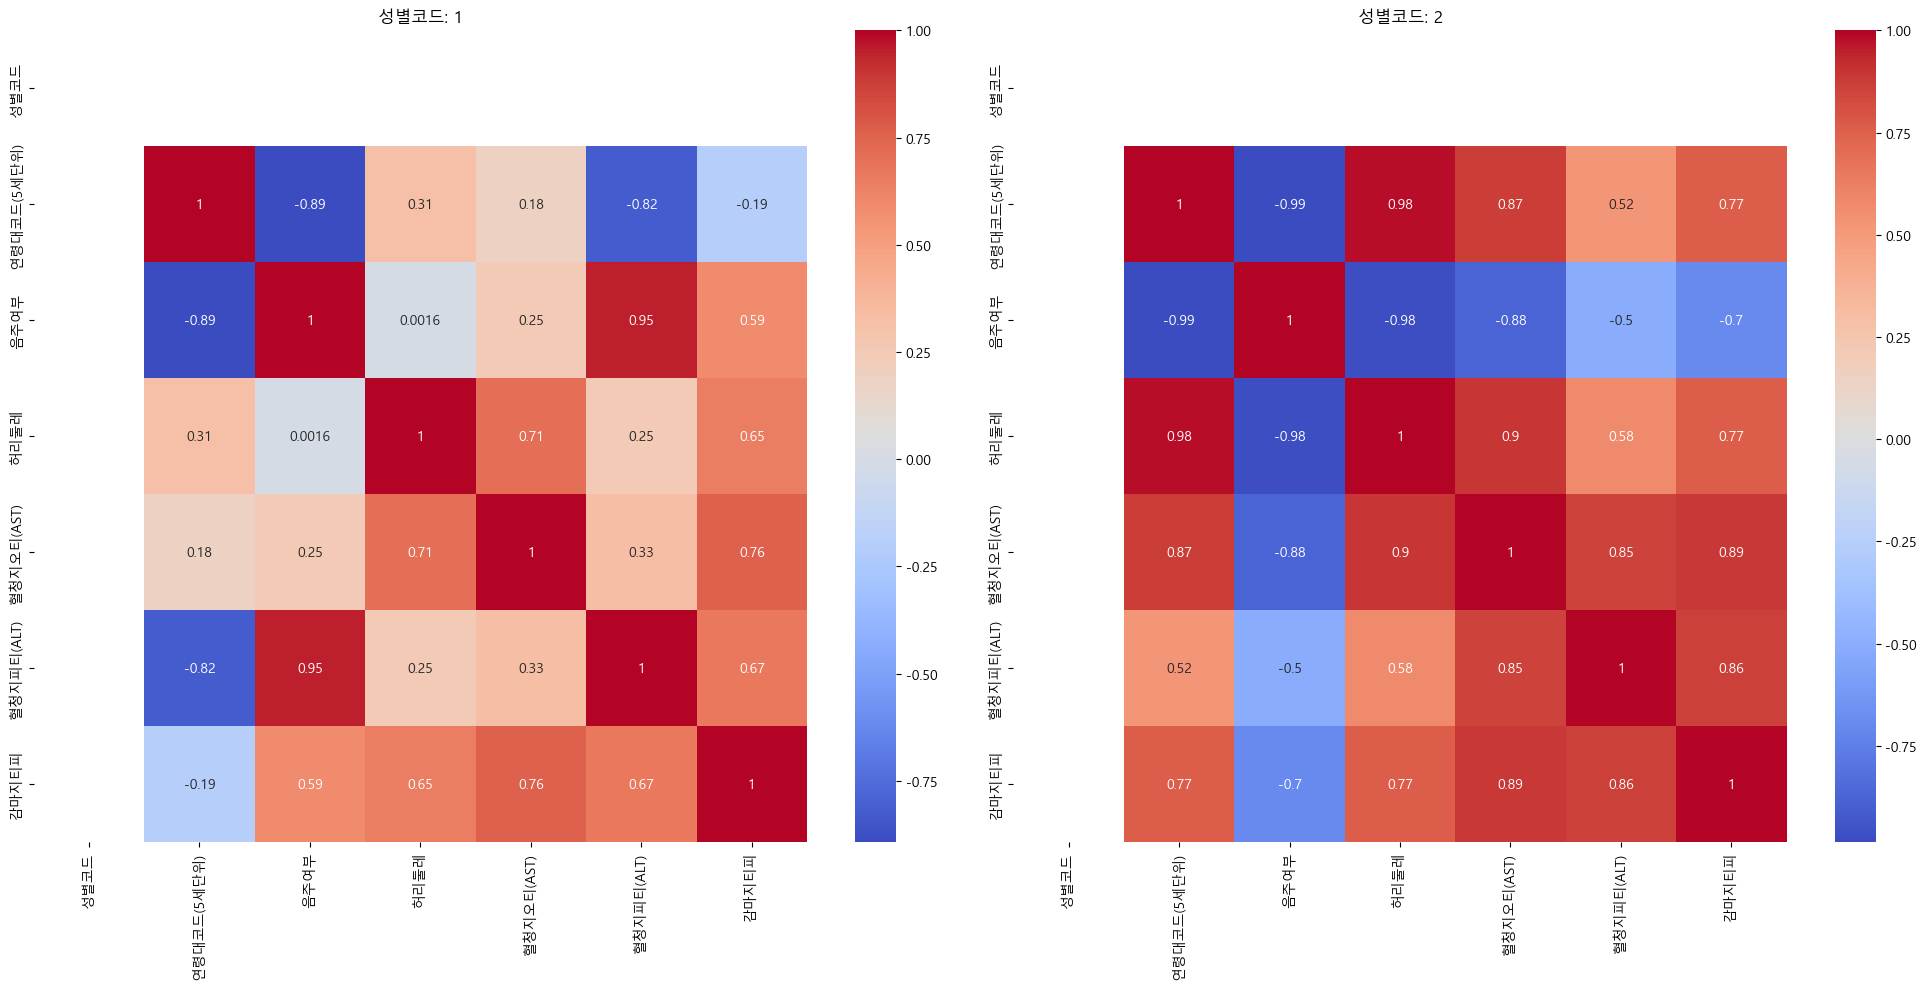

In [99]:
# 성별 값이 1 (예: 남자), 2 (예: 여자)라고 가정
gender_values = gan['성별코드'].unique()

# 서브플롯 생성
fig, axes = plt.subplots(1, len(gender_values), figsize=(20, 10))

for i, gender in enumerate(gender_values):
    # 성별 필터링
    df_gender = gan[gan['성별코드'] == gender]

    # 상관행렬 계산
    corr = df_gender.corr(numeric_only=True)

    # 히트맵 그리기
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'성별코드: {gender}')

plt.tight_layout()
plt.show()

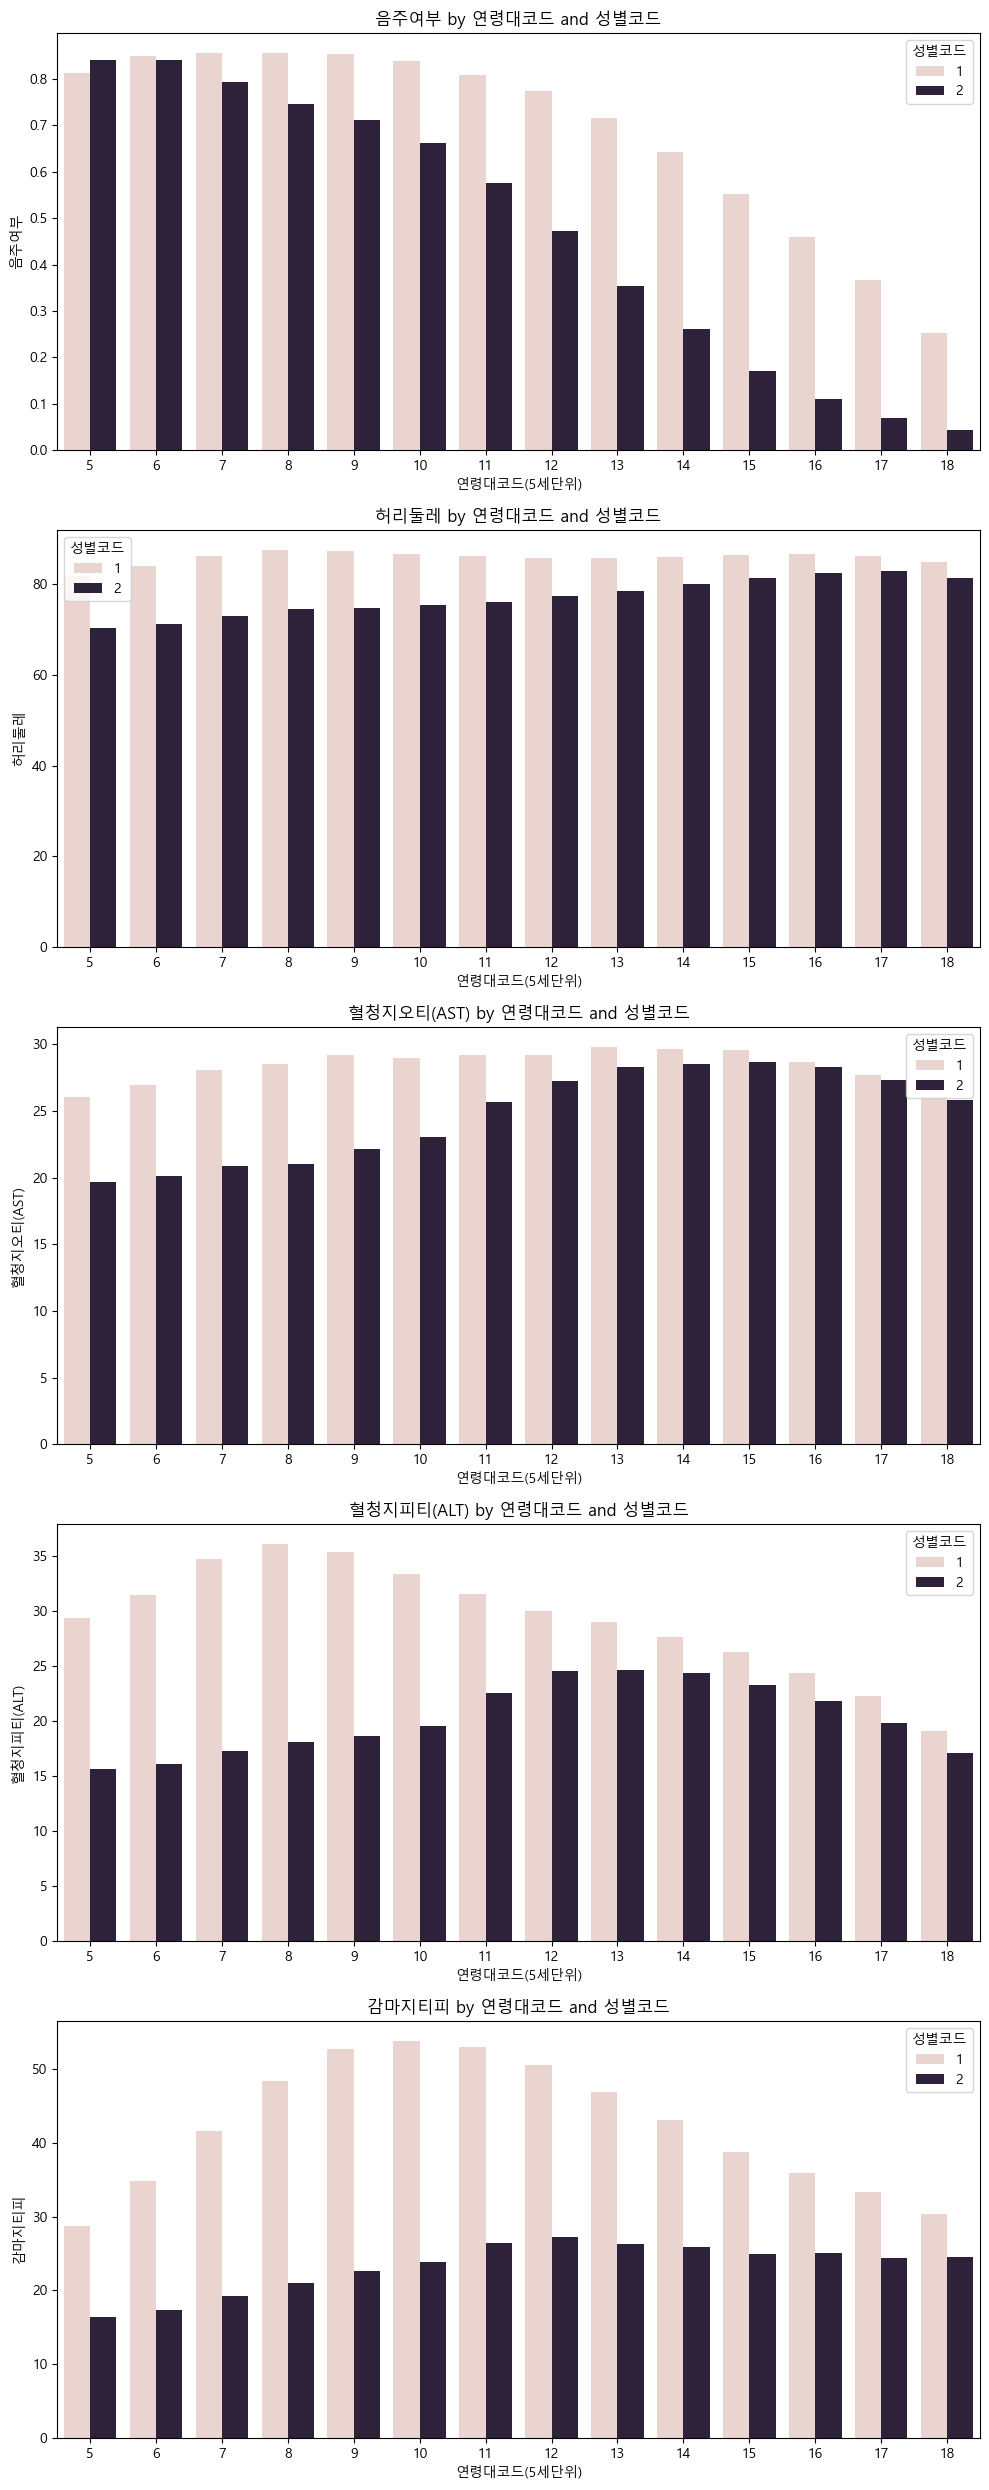

In [90]:
vari = [col for col in gan.columns if col not in ['성별코드', '연령대코드(5세단위)']]

# 시각화 설정
num_vars = len(vari)
fig, axes = plt.subplots(nrows=num_vars, figsize=(10, 5 * num_vars))

if num_vars == 1:
    axes = [axes]  # 변수가 하나일 경우에도 리스트로

for ax, var in zip(axes, vari):
    sns.barplot(
        data=gan,
        x='연령대코드(5세단위)',
        y=var,
        hue='성별코드',
        ax=ax
    )
    ax.set_title(f'{var} by 연령대코드 and 성별코드')
    ax.legend(title='성별코드')

plt.tight_layout()
plt.show()

In [91]:
sinjang = group_health[['성별코드', '연령대코드(5세단위)', '혈색소', '요단백']]
sinjang.head()

,성별코드,연령대코드(5세단위),혈색소,요단백
0,1,5,15.508712,1.114938
1,1,6,15.454716,1.107239
2,1,7,15.427322,1.128442
3,1,8,15.403699,1.138450
4,1,9,15.398644,1.151862


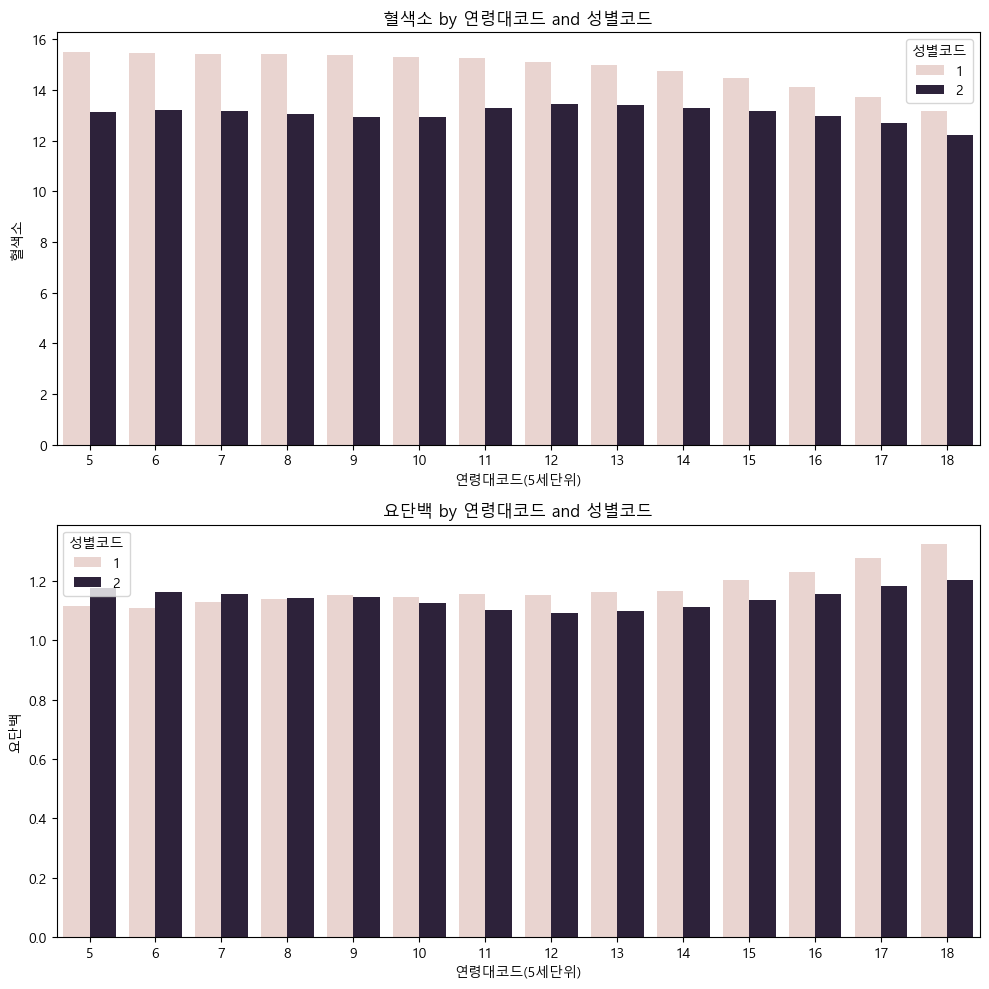

In [92]:
vari = [col for col in sinjang.columns if col not in ['성별코드', '연령대코드(5세단위)']]

# 시각화 설정
num_vars = len(vari)
fig, axes = plt.subplots(nrows=num_vars, figsize=(10, 5 * num_vars))

if num_vars == 1:
    axes = [axes]  # 변수가 하나일 경우에도 리스트로

for ax, var in zip(axes, vari):
    sns.barplot(
        data=sinjang,
        x='연령대코드(5세단위)',
        y=var,
        hue='성별코드',
        ax=ax
    )
    ax.set_title(f'{var} by 연령대코드 and 성별코드')
    ax.legend(title='성별코드')

plt.tight_layout()
plt.show()

In [93]:
health.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석'],
      dtype='object')

In [94]:
colle = health.loc[health['총콜레스테롤'].notna(), ['성별코드', '연령대코드(5세단위)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤']]
colle

,성별코드,연령대코드(5세단위),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤
0,2,9,168.0,181.0,46.0,86.0
2,2,13,220.0,307.0,52.0,107.0
3,1,13,91.0,171.0,45.0,11.0
9,1,10,194.0,59.0,55.0,127.0
10,2,13,212.0,94.0,57.0,136.0
...,...,...,...,...,...,...
999985,2,14,120.0,59.0,70.0,38.0
999988,2,17,247.0,113.0,64.0,160.0
999992,2,13,204.0,220.0,47.0,113.0
999994,2,12,246.0,85.0,77.0,152.0


In [95]:
group_colle = colle.groupby(['성별코드', '연령대코드(5세단위)']).mean(numeric_only=True).reset_index()
group_colle

,성별코드,연령대코드(5세단위),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤
0,1,5,182.882160,109.600197,54.729854,106.817351
1,1,6,192.988733,122.783091,54.556033,114.688004
2,1,7,201.887675,143.097522,53.766239,121.230983
3,1,8,206.456753,158.040686,52.406951,124.489802
4,1,9,209.248848,166.889837,52.589227,125.556814
5,1,10,205.656738,171.462595,52.685250,120.949879
6,1,11,200.835546,161.151404,52.932942,117.354152
7,1,12,195.040361,151.527470,52.731460,113.312028
8,1,13,186.670961,137.408421,52.848499,107.057364
9,1,14,177.468028,125.048243,52.358052,100.407213


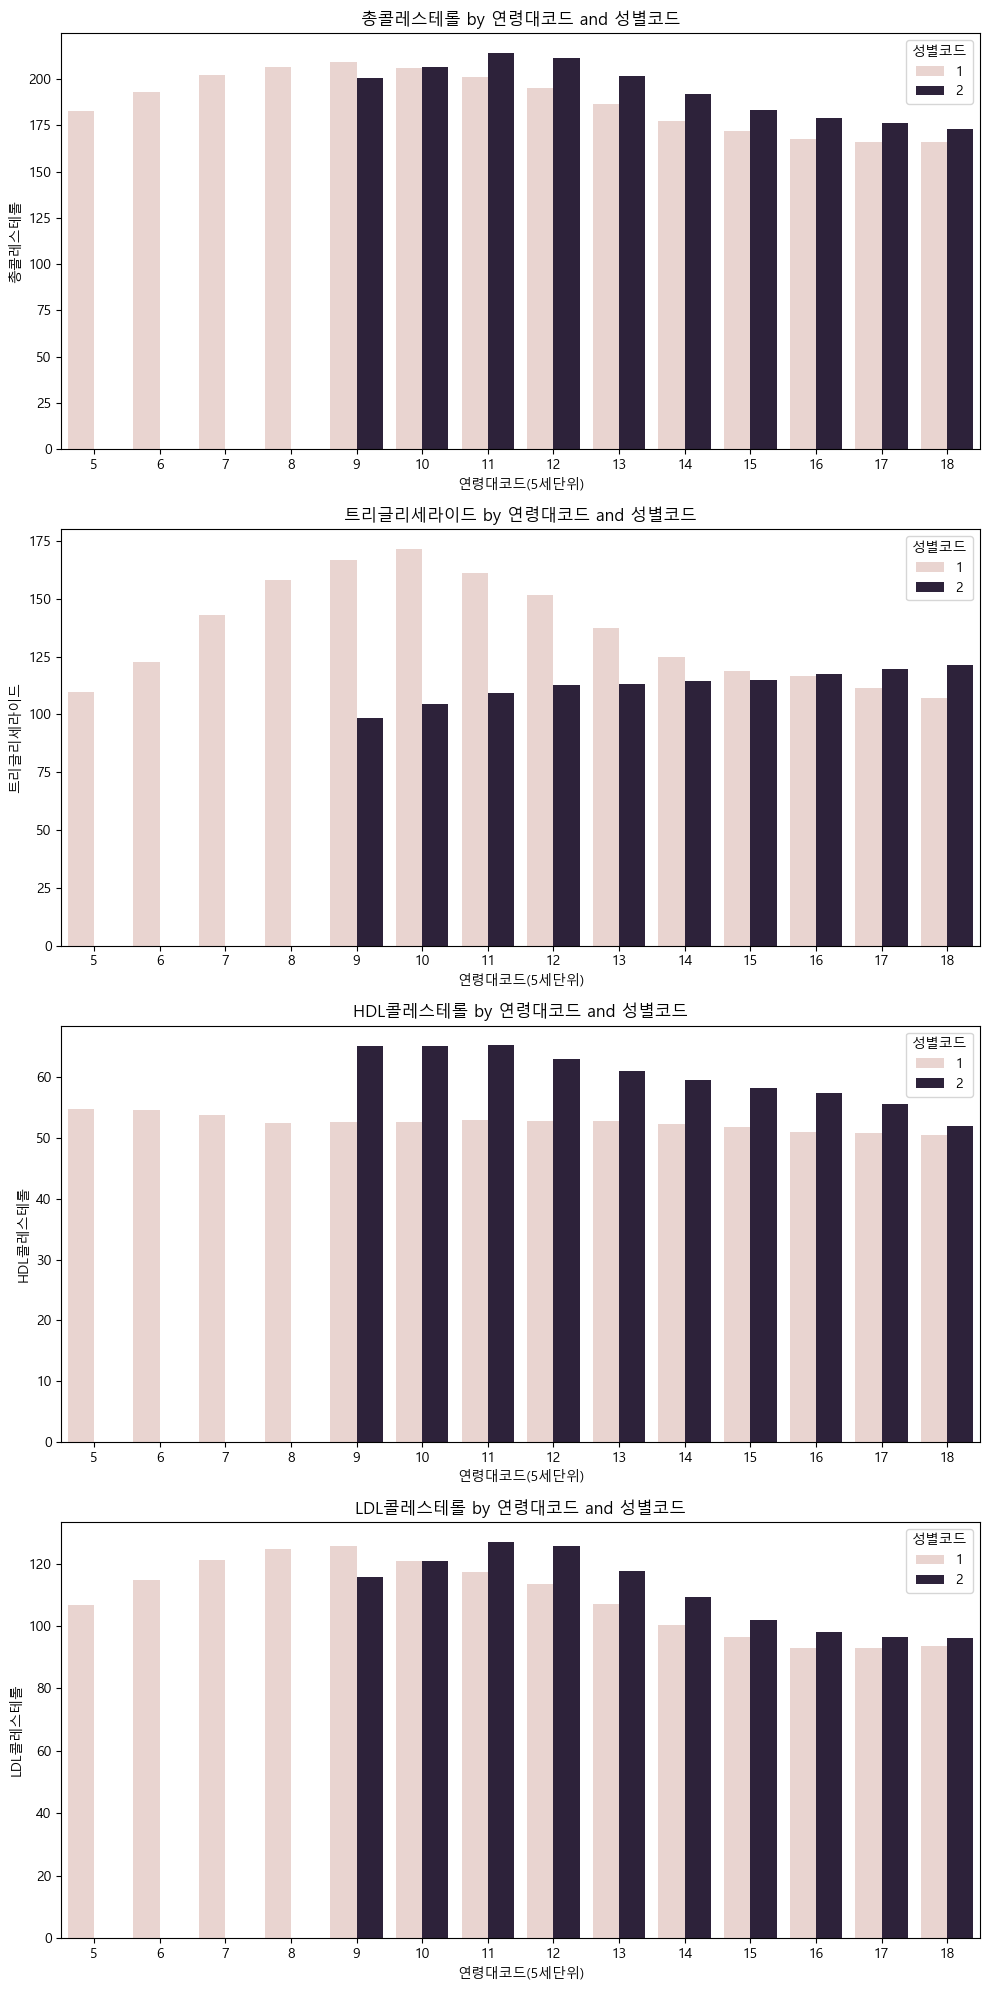

In [96]:
vari = [col for col in group_colle.columns if col not in ['성별코드', '연령대코드(5세단위)']]

# 시각화 설정
num_vars = len(vari)
fig, axes = plt.subplots(nrows=num_vars, figsize=(10, 5 * num_vars))

if num_vars == 1:
    axes = [axes]  # 변수가 하나일 경우에도 리스트로

for ax, var in zip(axes, vari):
    sns.barplot(
        data=group_colle,
        x='연령대코드(5세단위)',
        y=var,
        hue='성별코드',
        ax=ax
    )
    ax.set_title(f'{var} by 연령대코드 and 성별코드')
    ax.legend(title='성별코드')

plt.tight_layout()
plt.show()